In [1]:
import pandas as pd

In [5]:
import sys
from fbprophet import Prophet


Importing plotly failed. Interactive plots will not work.


In [6]:
df = pd.read_csv('BTC-USD.csv')
df = df[["Date", "Close"]]
df.columns = ["ds", "y"]
print(df)

             ds             y
0    2021-02-27  46188.453125
1    2021-02-28  45137.769531
2    2021-03-01  49631.242188
3    2021-03-02  48378.988281
4    2021-03-03  50538.242188
..          ...           ...
361  2022-02-23  37296.570313
362  2022-02-24  38332.609375
363  2022-02-25  39214.218750
364  2022-02-26  39105.148438
365  2022-02-27  38597.929688

[366 rows x 2 columns]


In [7]:
prophet = Prophet()
prophet.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
future = prophet.make_future_dataframe(periods=365)
print(future)

            ds
0   2021-02-27
1   2021-02-28
2   2021-03-01
3   2021-03-02
4   2021-03-03
..         ...
726 2023-02-23
727 2023-02-24
728 2023-02-25
729 2023-02-26
730 2023-02-27

[731 rows x 1 columns]


In [9]:
forecast = prophet.predict(future)
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(200)

,ds,yhat,yhat_lower,yhat_upper
531,2022-08-12,1766.138327,-22199.077755,26702.423206
532,2022-08-13,1460.226252,-23103.998123,26613.761438
533,2022-08-14,1401.942202,-22848.293670,28149.728067
534,2022-08-15,1135.402477,-24073.412621,26455.339145
535,2022-08-16,941.148826,-24443.124348,26703.948641
...,...,...,...,...
726,2023-02-23,-38405.398812,-121522.722430,47346.877657
727,2023-02-24,-38490.103733,-120047.062983,45954.844918
728,2023-02-25,-38796.015807,-121080.125641,47257.056167
729,2023-02-26,-38854.299858,-121751.358469,45618.059432


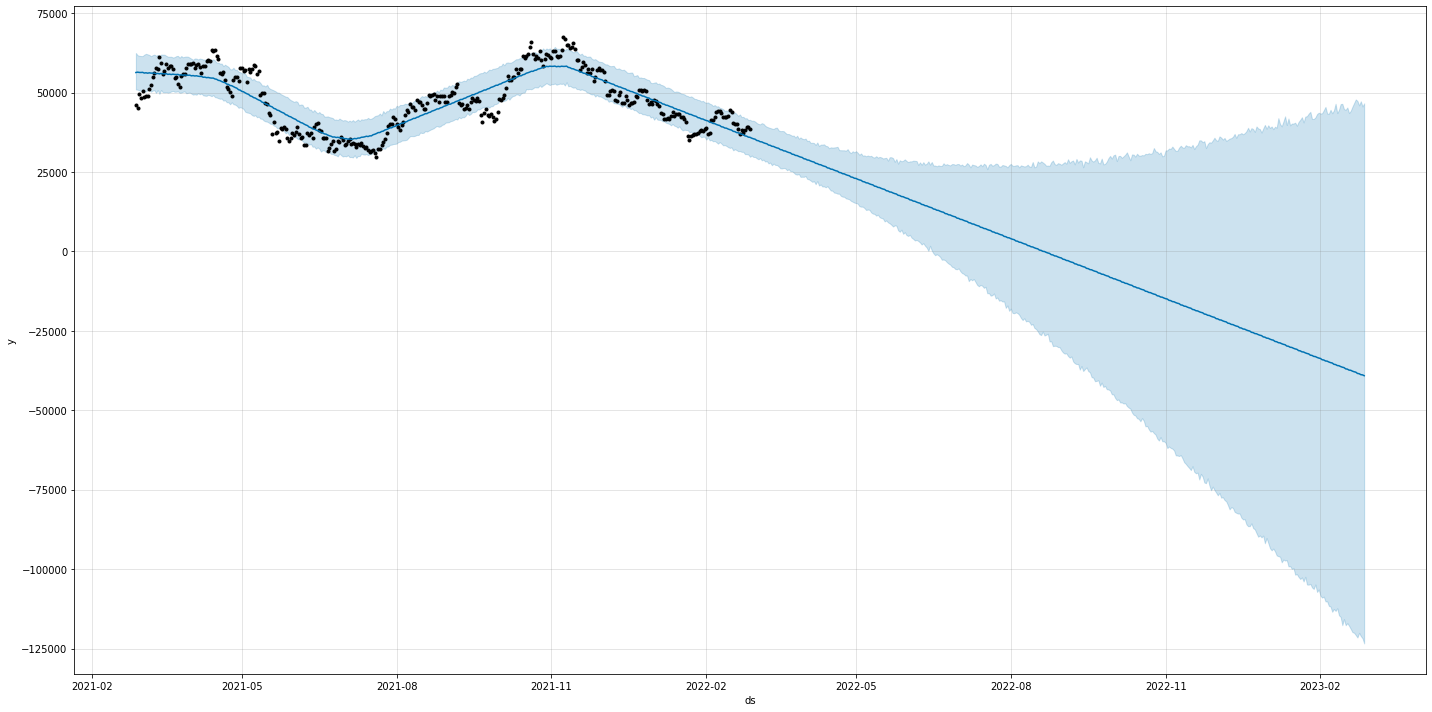

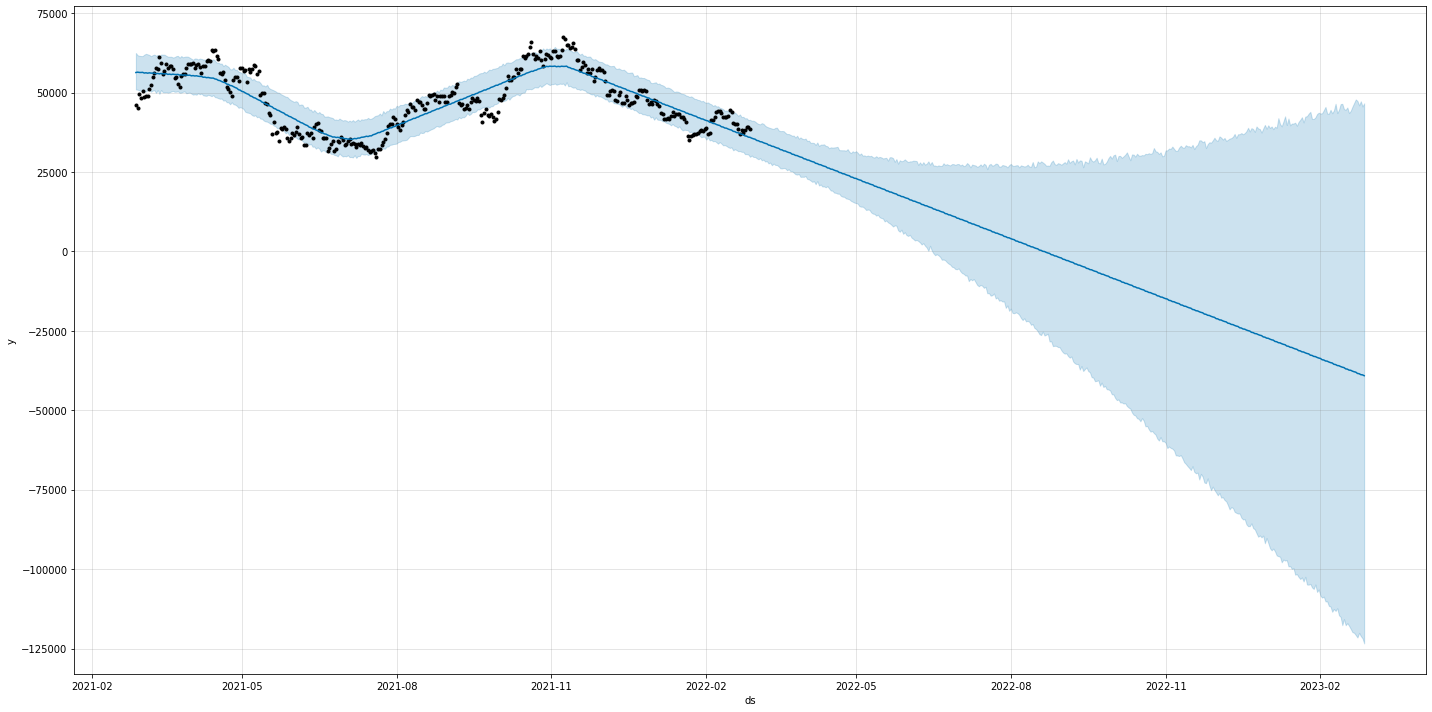

In [10]:
from fbprophet.plot import plot
prophet.plot(forecast, figsize=(20, 10))